In [1]:
#%pylab inline
#import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import FortranFile
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [2]:
gridfile='/raid2/rafkin/output/PP_Ls270_static-S-g03.nc'
modelfile='/raid2/rafkin/output/PP_Ls270-S-g03.nc'
#tracerfile='/raid2/rafkin/output/PP_Ls270_tracers-S-g04.nc'
#gridfile='/raid2/rafkin/output/Insight_Ls312_static-S-g03.nc'
#modelfile='/raid2/rafkin/output/Insight_Ls312_state-S-g03.nc'
#tracerfile='/raid2/rafkin/output/PP_Ls270_tracers-S-g05.nc'
gf=Dataset(gridfile,mode='r')
mf=Dataset(modelfile,model='r')
#tf=Dataset(tracerfile,model='r')
#
# files are open and ready to read
# extract wanted data as 1D list array
# Note that this reads in ALL the data and is SLOW
# Probably a way to read in only the stuff we want
# but I haven't figured that out yet.
#
glon = gf.variables['glon'][:]
glat = gf.variables['glat'][:]
topo = gf.variables['topo'][:]
zlyr = gf.variables['z_lyrbnd_AGL'][:] #t,y,x,z
#u_avg_tN=mf.variables['u_avg_tN'][0:900,:,:,:]
#v_avg_tN=mf.variables['v_avg_tN'][0:900,:,:,:]
#sclr1=tf.variables['sclr001'][0:900,:,:,:]
#sclr2=tf.variables['sclr001'][:]
#sclr3=tf.variables['sclr001'][:]
#sclr4=tf.variables['sclr001'][:]
#sclr5=tf.variables['sclr001'][:]
#sclr6=tf.variables['sclr001'][:]
#sclr7=tf.variables['sclr001'][:]
#sclr8=tf.variables['sclr001'][:]
#sclr9=tf.variables['sclr001'][:]
#sclr10=tf.variables['sclr001'][:]
#sclr11=tf.variables['sclr001'][:]
#sclr12=tf.variables['sclr012'][0:900,:,:,:]
#sclr13=tf.variables['sclr001'][:]
#sclr14=tf.variables['sclr001'][:]
#sclr15=tf.variables['sclr001'][:]
#sclr16=tf.variables['sclr001'][:]
#sclr17=tf.variables['sclr001'][:]
#sclr18=tf.variables['sclr001'][:]
#sclr19=tf.variables['sclr001'][:]
#sclr20=tf.variables['sclr001'][:]
#sclr21=tf.variables['sclr001'][:]
#sclr22=tf.variables['sclr001'][:]
#sclr23=tf.variables['sclr001'][:]
tempk=mf.variables['tempk'][:]
#
# Reload these into 2D or 3D arrays
# Note that there is only 1 time for grid data
# and even for glon, glat, topo...stored as 3D in netcdf
# First element is time, followed by x, y then z
#
lat=glat[0,:,:]
lon=glon[0,:,:]
topo2d=topo[0,:,:]
#sclr3d_1=sclr1[21,:,:,:]  #grab time 22...indexing starts at 0
#cs0=plt.contourf(lon,lat,topo2d)
#cs1=plt.contour(lon,lat,lat)
#cs2=plt.contour(lon,lat,lon)
#plt.show()
#sclr12.shape

In [3]:
#tempk.shape
import pandas as pd
#df = pd.read_csv('traj5_fixedu.tra', delimiter= '\s+', index_col=False)
df=pd.read_csv('traj5_fixedu.tra', delim_whitespace=True, index_col=False)
#df.u[3]
#df.lon[0]
#df.lat[0]
df.keys()




Index(['time', 'lat', 'lon', 'topo', 'agl', 'u', 'v', 'w', 'dx', 'dy', 'dz'], dtype='object')

In [4]:
df.u[4]


5.0

In [5]:
#print(tempk.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
xmin=1
xmax=98
ymin=1
ymax=128
xlon=lon[ymin:ymax,xmin:xmax]
xlat=lat[ymin:ymax,xmin:xmax]
#levels=[-6,-4,-2,0]
levels=24
#zdat1=sclr1[35:36,ymin:ymax,xmin:xmax,1] #sum over time 1 and 40
#zsum1=np.sum(zdat1,axis=0)
#zdat12=sclr12[135+36:136+36,ymin:ymax,xmin:xmax,1] #sum over time 1 and 40
#zsum12=np.sum(zdat12,axis=0)
#u=u_avg_tN[35,ymin:ymax,xmin:xmax,1]
#v=v_avg_tN[35,ymin:ymax,xmin:xmax,1]
#temp=tempk[35,ymin:ymax,xmin:xmax,1]
topox=topo2d[ymin:ymax,xmin:xmax]
#cs1=plt.contour(lon,lat,topo2d)
#cs2=ax.contour(xlon,xlat,zsum,levels)
#ax.contour(xlon,xlat,np.log10(zdat+1.e-10))
#cs1=plt.contourf(xlon,xlat,np.log10(np.maximum(zsum12,1.e-10)), levels)
cs1=plt.contourf(xlon,xlat,topox)
#cs1=plt(temp)
#plt.colorbar()
#ax.clabel(cs1,inline=1, fontsize=12, fmt="%1d", colors='black')
#cs12=plt.contour(xlon,xlat,np.log10(zsum12+1.e-10), levels, colors='red',linestyles='solid', linewidths=0.75)
#ax.clabel(cs12,inline=1, fontsize=12, fmt="%1d", colors='black')
#cs0=plt.contour(xlon,xlat,topo2d[ymin:ymax,xmin:xmax], linewidths=0.5, colors='black', linestyles='solid')
#ax.clabel(cs12,inline=1,fontsize=12, fmt="%1d", colors='red')
#plt.quiver(xlon,xlat,u,v)
for i in range(0,3900):
    #print(df.lon[i],df.lat[i],df.agl[i],df.topo[i])
#    plt.scatter(df.lon[0],df.lat[0])
#    plt.scatter(df.lon[i],df.lat[i],s=6)
    #print(df.lon[i])
    #print(df.lat[i])
    #print(df.keys)
    plat=float(df.lat[i])
    plon=float(df.lon[i])
    plt.scatter(plon,plat,s=6)
#plt.scatter[df.lon,df.lat]
plt.xlabel('Longitude')        
plt.ylabel('Latitude')    
#plt.title('Tracer #1 in Gale Crater 3 Hours after 0600 LMST Release')
#plt.title('Tracer #12 in Gale Crater 3 Hours after 1800 LMST Release')
#plt.show(cs0)
#plt.contourf(lon,lat,topo2d)
plt.show()
#print(df.lon[0],df.lat[0])


In [10]:
for i in range(0,3900):
    #print(df.lon[i],df.lat[i],df.agl[i],df.topo[i])
#    plt.scatter(df.lon[0],df.lat[0])
#    plt.scatter(df.lon[i],df.lat[i],s=6)
    #print(df.lon[i])
    #print(df.lat[i])
    #print(df.keys)
    plat=float(df.lat[i])
    plon=float(df.lon[i])
    pagl=float(df.agl[i])
    ptopo=float(df.topo[i])
    pz=pagl+ptopo
    cs2=plt.scatter(plon,ptopo,s=2)
    cs2=plt.scatter(plon,pz,s=4)
#plt.scatter[df.lon,df.lat]
plt.xlabel('Longitude')        
plt.ylabel('Aeroid Height (m)')  
plt.title('Parcel Height and Topo')
plt.show()


In [6]:
for i in range(0,3900):
    plat=float(df.lat[i])
    plon=float(df.lon[i])
    pagl=float(df.agl[i])
    ptopo=float(df.topo[i])
    pz=pagl+ptopo
    cs2=plt.scatter(plat,ptopo,s=2)
    cs2=plt.scatter(plat,pz,s=4)
#plt.scatter[df.lon,df.lat]
plt.xlabel('latitude')        
plt.ylabel('Aeroid Height (m)')  
plt.title('Parcel Height and Latitude')
plt.show()

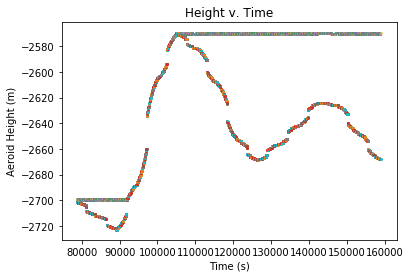

In [7]:
for i in range(0,3900):
    plat=float(df.lat[i])
    plon=float(df.lon[i])
    pagl=float(df.agl[i])
    ptopo=float(df.topo[i])
    ptime=float(df.time[i])
    pz=pagl+ptopo
    cs2=plt.scatter(ptime,pz,s=2)
    cs2=plt.scatter(ptime,ptopo,s=4)
plt.xlabel('Time (s)')        
plt.ylabel('Aeroid Height (m)')  
plt.title('Height v. Time')
plt.show()

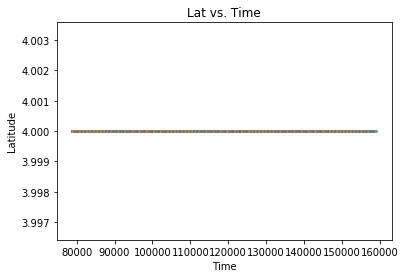

In [13]:
for i in range(0,3900):
    plat=float(df.lat[i])
    plon=float(df.lon[i])
    pagl=float(df.agl[i])
    ptopo=float(df.topo[i])
    ptime=float(df.time[i])
    pz=pagl+ptopo
    cs2=plt.scatter(ptime,plat,s=2)
plt.xlabel('Time')        
plt.ylabel('Latitude')  
plt.title('Lat vs. Time')
plt.show()

In [14]:
for i in range(0,3900):
    pu=float(df.u[i])
    pv=float(df.v[i])
    pw=float(df.w[i])
    ptopo=float(df.topo[i])
    ptime=float(df.time[i])
    pz=pagl+ptopo
    cs2=plt.scatter(ptime,np.sqrt(pu*pu+pv*pv*pw*pw),s=2)
plt.xlabel('Time')        
plt.ylabel('Speed')  
plt.title('Speed v. Time')
plt.show()

In [ ]:
#Let's construct a 2-d axis along x=const 
#This will have latitude along the x-axis and topo+zlyrbnd along the z-axis
# Need to make topo a 3d array with same values at all a levels
# How many z levels do we need?
z3d=zlyr[0,:,:,:] #y,x,z
znum=z3d.shape[2]
print(znum)
print(z3d.shape)
tempk3d=tempk[2,:,:,:]  # time 3  #y,x,z
#add topo to get actual height
zcross=z3d*1.0  #make a new array with zlyrbnd values
for i in range(znum):
    zcross[:,:,i]=z3d[:,:,i]+topo2d[:,:]
#now make an array that has appropriate lat/lon as a func of height
xcross=1.*z3d #new array of appropriate dimensions
ycross=1.*z3d
for i in range(znum):
    xcross[:,:,i]=lat[:,:] #y,x
    ycross[:,:,i]=lon[:,:] #y,x
#for a cross-section along x (fixed x)
#plt.contourf(xcross[:,30,:],zcross[:,30,:],tempk3d[:,30,:])
#for a cross-section along y (fixed y)
# note, has problms with longitude wrapping -180->0->180->-180
plt.contourf(ycross[30,0:56,0:40],zcross[30,0:56,0:40],tempk3d[30,0:56,0:40])
for i in range(0,3000):
    plon=float(df.lon[i])
    pz=float(df.agl[i])+float(df.topo[i])
    #print(pz,plon)
    plt.scatter(plon,pz,s=6)
plt.xlabel('Longitude')        
plt.ylabel('Height (m)')
#print(ycross[0,0,10])
plt.show()

In [ ]:
pz
print(pz,plon)